# K-Means Clustering 

The K-Means Clustering algorithm will categorize the items into k groups of similarity. To calculate that similarity, we will use the euclidean distance as measurement.

Algorithm		
1. Clusters the data into k groups where k  is predefined.

2. Select k points at random as cluster centers.

3. Assign objects to their closest cluster center according to the Euclidean distance function.

4. Calculate the centroid or mean of all objects in each cluster.

5. Repeat steps 2, 3 and 4 until the same points are assigned to each cluster in consecutive rounds.

Here i am using the the dataset : **10_market.csv**

this is a dataset consisits of two columns - Loyalty and Satisfaction of customers in a product. We will try to analyse the the type of customers in the market based on these features. 

In [0]:
import numpy as np                  #  to deal with multidimensional arrays
import pandas as pd                 # to organize data in tabular form
import matplotlib.pyplot as plt     # visualizing the numpy computation
import seaborn as sns               # to the visualization of Matplotlib
sns.set()
from sklearn.cluster import KMeans  # here we are importing KMeans from it

In [0]:
from google.colab import files
uploaded = files.upload()

Saving 10_market.csv to 10_market.csv


In [0]:
import io
data = pd.read_csv(io.BytesIO(uploaded['10_market.csv']))

In [0]:
print(data.head())

   Satisfaction  Loyalty
0             4    -1.33
1             6    -0.28
2             5    -0.99
3             7    -0.29
4             4     1.06


In [0]:
print(data.describe())

       Satisfaction    Loyalty
count     30.000000  30.000000
mean       6.400000   0.001000
std        2.620871   1.016476
min        1.000000  -1.690000
25%        4.250000  -0.967500
50%        7.000000   0.150000
75%        8.750000   0.947500
max       10.000000   1.380000


In [0]:
print(data.shape)

(30, 2)


There are thirty observations with features satisfaction and Loyalty .The data here is in .csv format.

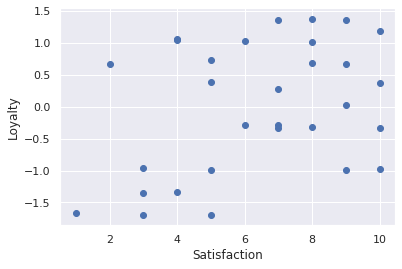

In [0]:
# Plotting the data between Satisfaction and Loyalty

plt.scatter(data['Satisfaction'],data['Loyalty'])
plt.xlabel('Satisfaction')
plt.ylabel('Loyalty')
plt.show()

In [0]:
x=data.copy() #  creating a copy of our data and storing it in variable x

In [0]:
kmeans=KMeans(2)
kmeans.fit(x)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=2, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

we will create a variable kmeans and by passing the argument 2 in KMeans to create 2 clusters. This code will perform the kmeans algorithm and will create two clusters. It will classify our data into two clusters.
We can see the number of iterations that has been perfomed is 300.

In [0]:
clusters=x.copy() # create a copy of x and store it in clusters
clusters['cluster_pred']=kmeans.fit_predict(x)

create a new column called cluster_predict which will have the value as predicted kmeans algorithm.

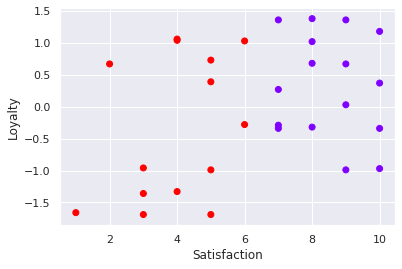

In [0]:
# ploting the clustered data

plt.scatter(clusters['Satisfaction'],clusters['Loyalty'],c=clusters['cluster_pred'],cmap='rainbow')
plt.xlabel('Satisfaction')
plt.ylabel('Loyalty')
plt.show()

This is a bias result because our model has discarded the Loyalty feature. The Satisfaction is choosen as a feature and loyalty has been neglected. 

Satisfaction was choosen as the feature because it had large values. So here is the problem both the data are not scaled. First we have to standardize the data, so that both the data have equal weights in our clustering

In [0]:
# Scaling the dataset..................................
from sklearn import preprocessing
x_scaled=preprocessing.scale(x)
x_scaled

array([[-0.93138063, -1.3318111 ],
       [-0.15523011, -0.28117124],
       [-0.54330537, -0.99160391],
       [ 0.23284516, -0.29117733],
       [-0.93138063,  1.05964534],
       [-2.09560642, -1.6620122 ],
       [ 1.39707095, -0.97159172],
       [ 0.62092042, -0.32119561],
       [ 0.62092042,  1.01962097],
       [ 0.62092042,  0.67941378],
       [ 1.39707095, -0.3412078 ],
       [-0.54330537,  0.38923705],
       [-0.54330537, -1.69203048],
       [-1.70753116,  0.66940768],
       [ 0.23284516,  0.26916393],
       [ 1.00899568,  1.35982816],
       [ 0.62092042,  1.37984035],
       [ 0.23284516,  1.35982816],
       [ 0.23284516, -0.3412078 ],
       [ 1.00899568,  0.66940768],
       [ 1.39707095,  1.17971847],
       [-1.31945589, -1.69203048],
       [-0.93138063,  1.03963316],
       [-1.31945589, -0.96158562],
       [-0.15523011,  1.02962706],
       [ 1.00899568, -0.99160391],
       [ 1.39707095,  0.36922486],
       [ 1.00899568,  0.02901767],
       [-1.31945589,

The data is scaled around zero mean. Here both the data are equally scaled.

In [0]:
# Calculating within the cluster sum of square using Elbow Method.
wcss=[]
for i in range(1,30):
  kmeans=KMeans(i)
  kmeans.fit(x_scaled)
  wcss.append(kmeans.inertia_)
wcss

[60.0,
 29.818973034723147,
 17.913349527387965,
 10.247181805928422,
 7.792695153937187,
 6.569489487091783,
 5.490486466725132,
 4.337110750237059,
 3.687975963852466,
 3.329544005339524,
 3.044363710304956,
 2.5277661593242606,
 2.2293147798337243,
 1.84655109834592,
 1.5724205073309323,
 1.3067160316026745,
 1.1357427619934148,
 0.9716636175522552,
 0.8801426624837578,
 0.6791308623091884,
 0.5451582152303865,
 0.42313027513905704,
 0.3227119817275011,
 0.24721053307798668,
 0.17170908442847233,
 0.11383861748989679,
 0.0559681505513213,
 0.0014517677692203244,
 0.00020024383023728806]

We will use elbow method when we are confused as to how may clusters do we need. The elbow method will starts of with making one cluster to the number of clusters in our sample and with the kmeans inertia value, we determine what would be the appropriate number of clusters.

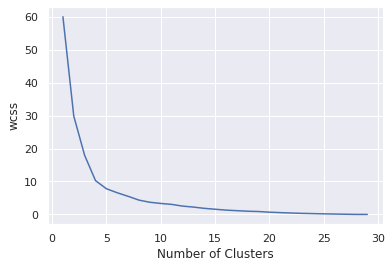

In [0]:
plt.plot(range(1,30),wcss)
plt.xlabel('Number of Clusters')
plt.ylabel('wcss')
plt.show()

This graph looks like elbow and we have to determine elbow point from this graph.
Here the elbow point comes at around 4 and this our optimal number of clusters. After 4 when we go on increasing the number of cluster there is no big change in the wcss.

In [0]:
# perform clustering with 4 clusters

kmeans_new=KMeans(4)
kmeans.fit(x_scaled)
cluster_new=x.copy()
cluster_new['cluster_pred']=kmeans_new.fit_predict(x_scaled)
cluster_new

,Satisfaction,Loyalty,cluster_pred
0,4,-1.33,1
1,6,-0.28,2
2,5,-0.99,1
3,7,-0.29,2
4,4,1.06,0
5,1,-1.66,1
6,10,-0.97,2
7,8,-0.32,2
8,8,1.02,3
9,8,0.68,3


Here, our whole data is categorized into either 0,1,2 or 3.

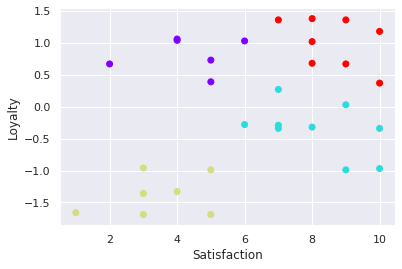

In [0]:
# Plotting the new cluster............................

plt.scatter(cluster_new['Satisfaction'],cluster_new['Loyalty'],c=cluster_new['cluster_pred'],cmap='rainbow')
plt.xlabel('Satisfaction')
plt.ylabel('Loyalty')
plt.show()

1. The purple dots are the people who are less satisfied and less loyal
2. The red dots are people with high loyalty and less satisfaction.
3. The yellow dots are the people with high loyalty and high satisfaction.
4. The sky blue dots are the people who neural responce.